In [2]:
%load_ext autoreload
%autoreload 2
%pylab inline

from collections import defaultdict, OrderedDict, Counter
import copy
import time
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from datetime import date, datetime
import uuid
import os
from PIL import Image
import io
import pickle

from ventricle_segmentation.utils import plot_annotated_scan, make_sure_path_exists, pickle_dump
from ventricle_segmentation.parsing import load_annotated_scans
import ventricle_segmentation.cfg as cfg

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


/home/prinda/.pyenv/versions/3.6.4/envs/pyArterys/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


/home/prinda/.pyenv/versions/3.6.4/envs/pyArterys/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


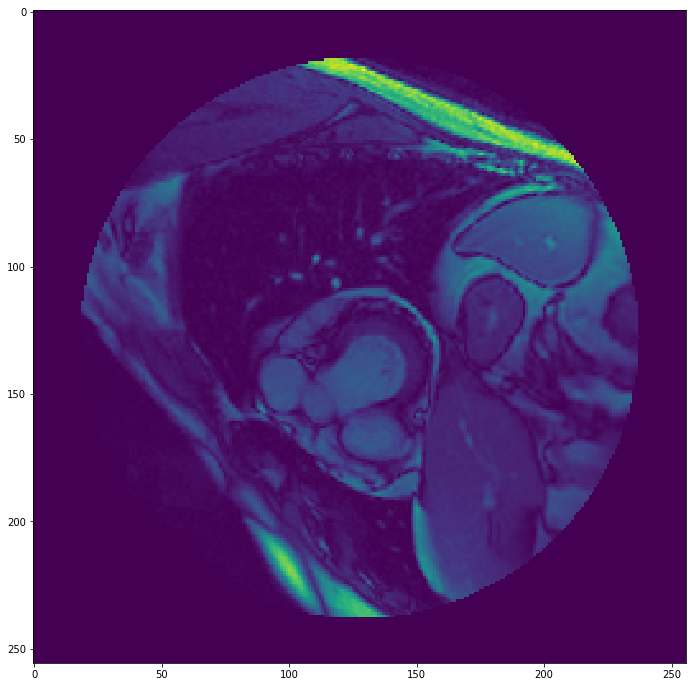

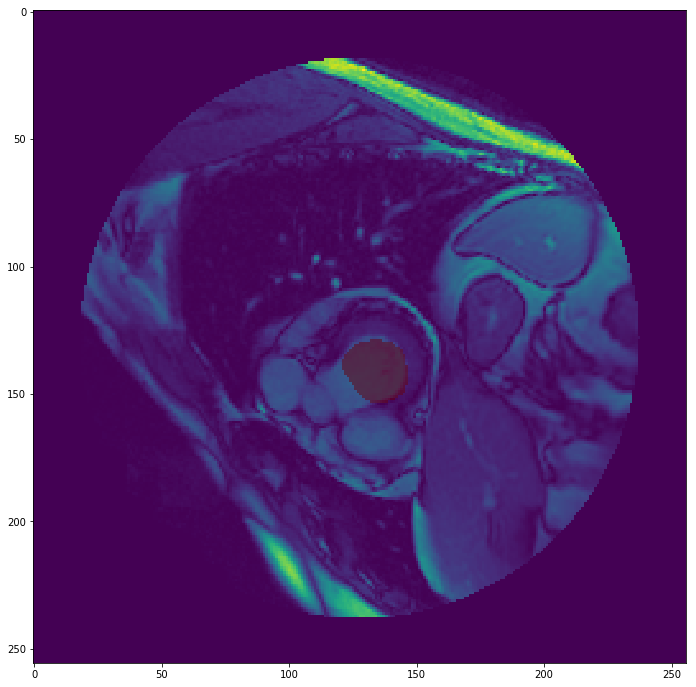

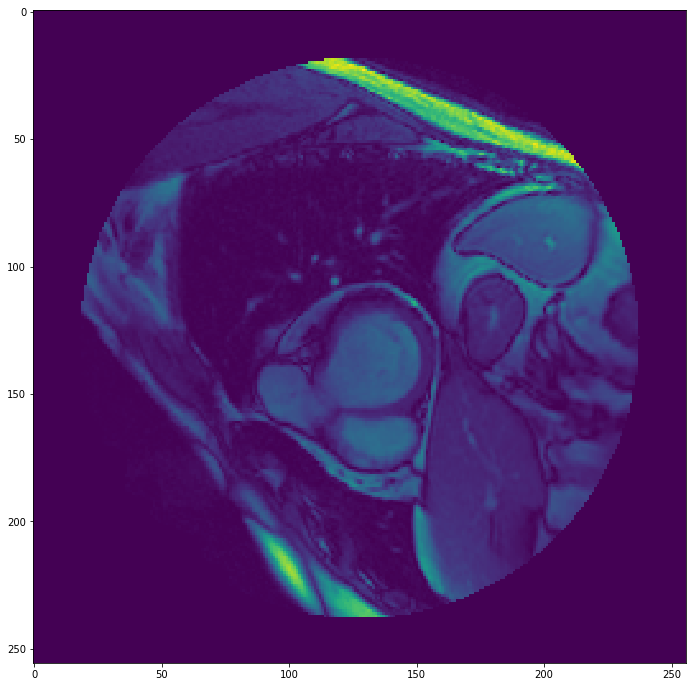

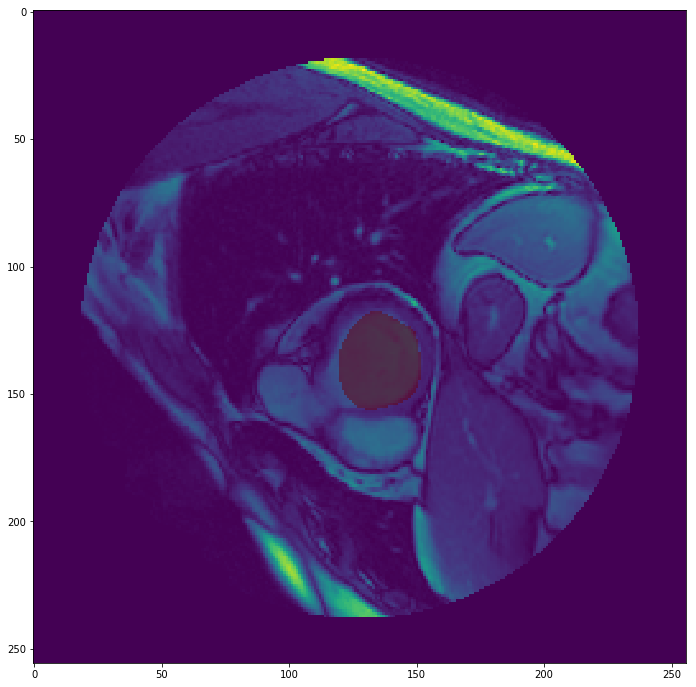

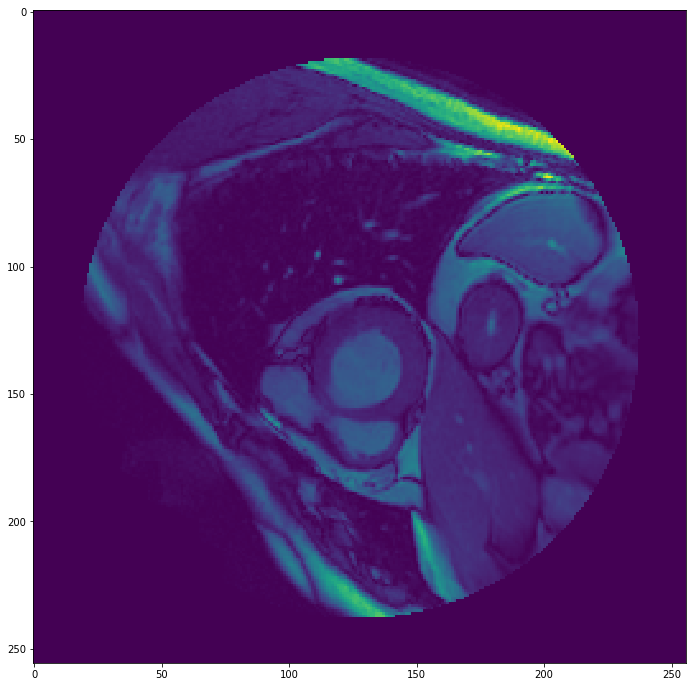

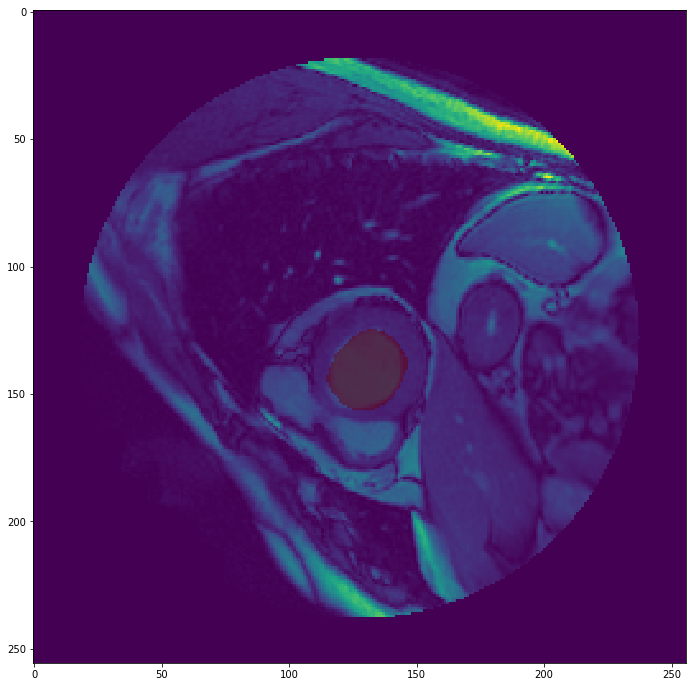

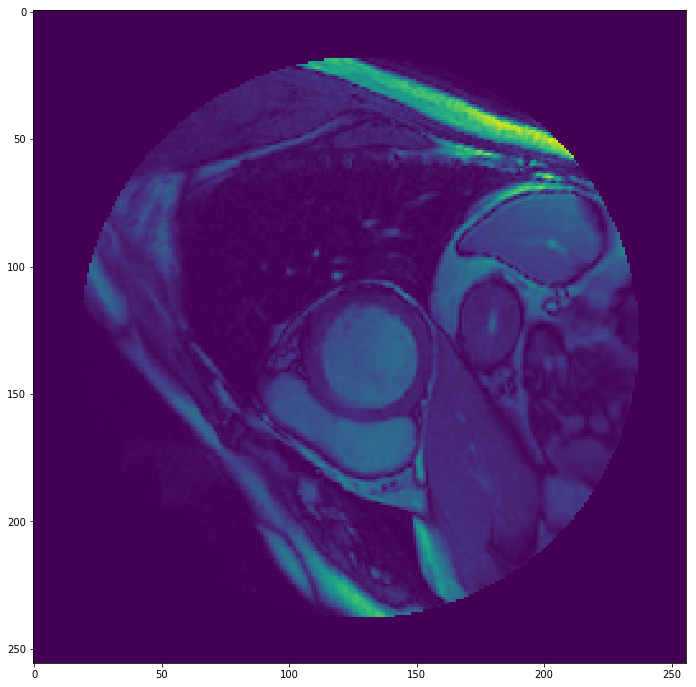

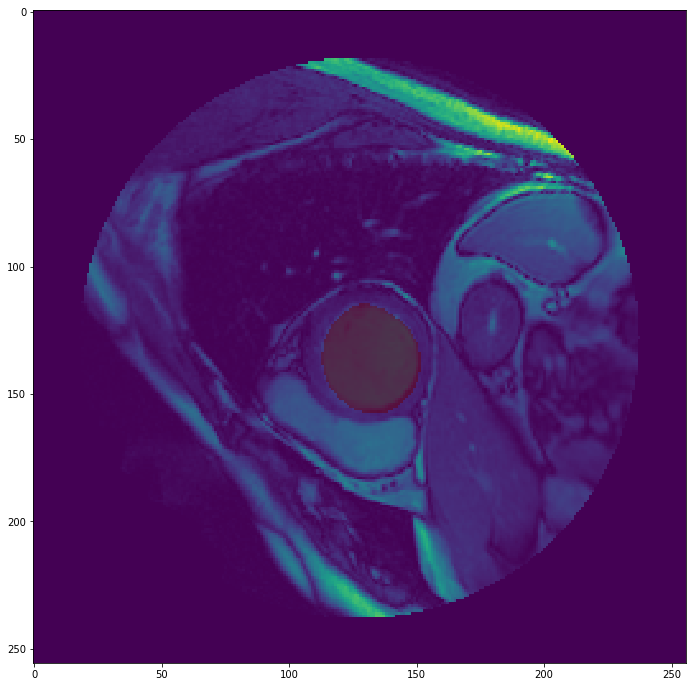

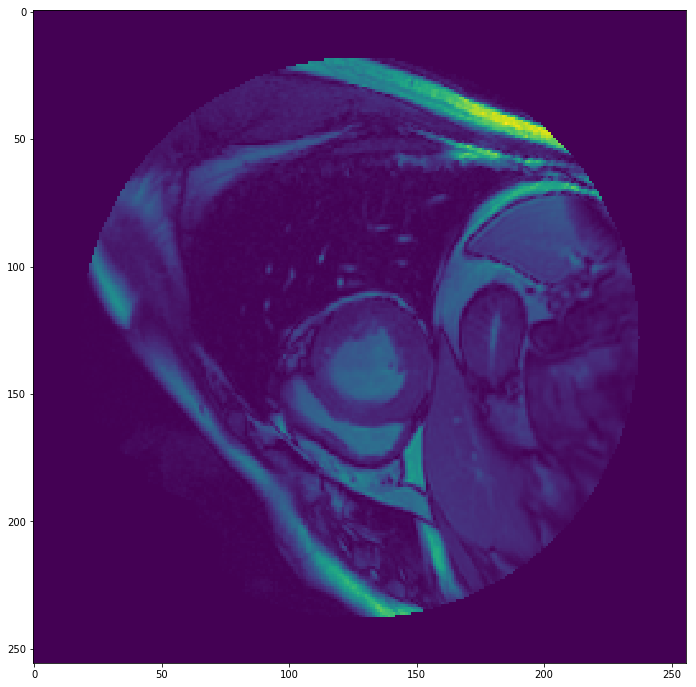

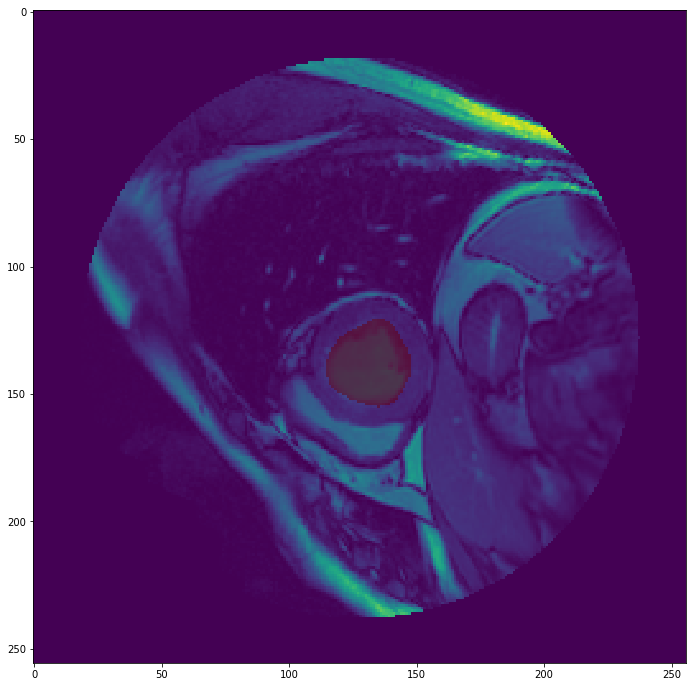

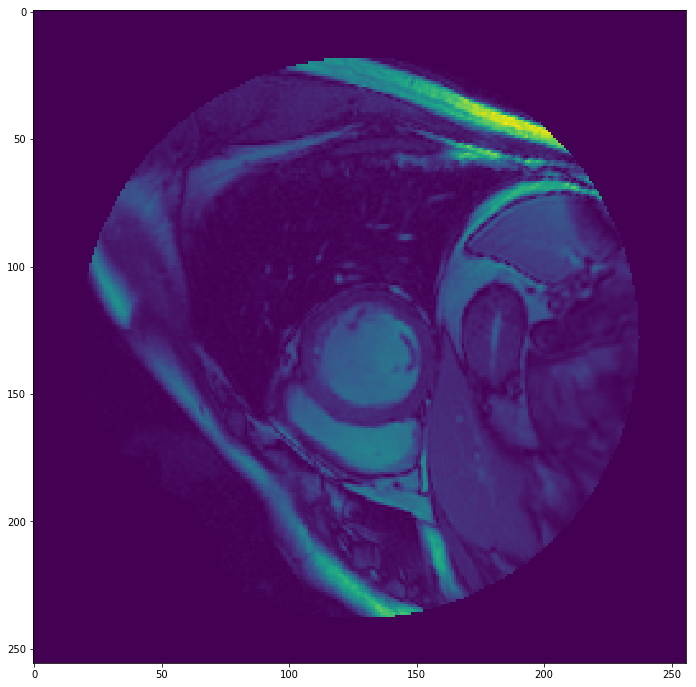

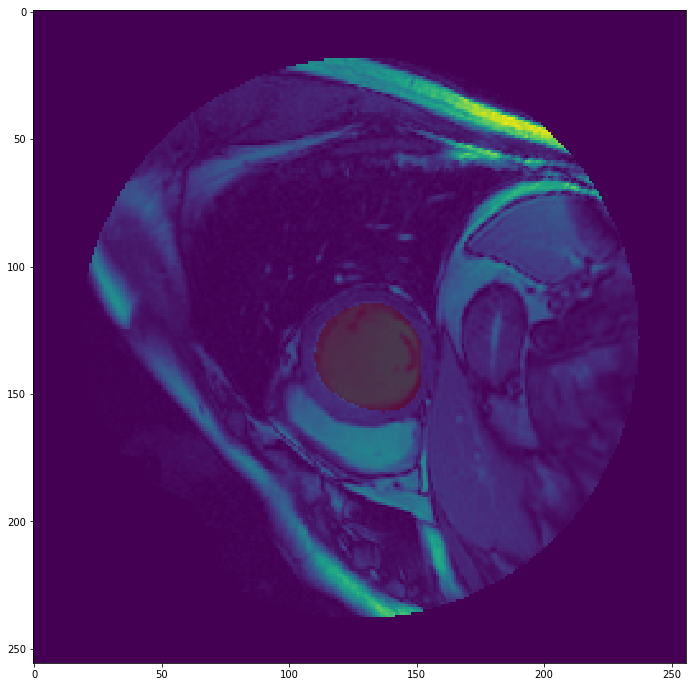

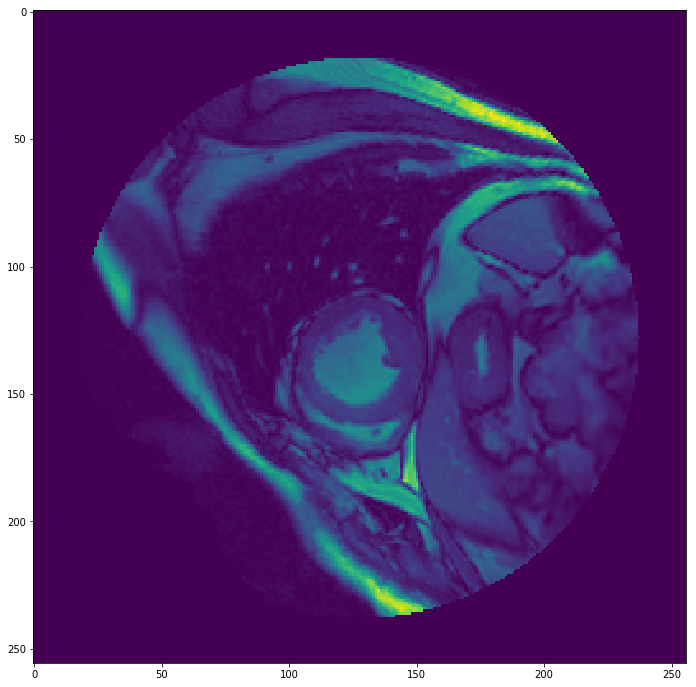

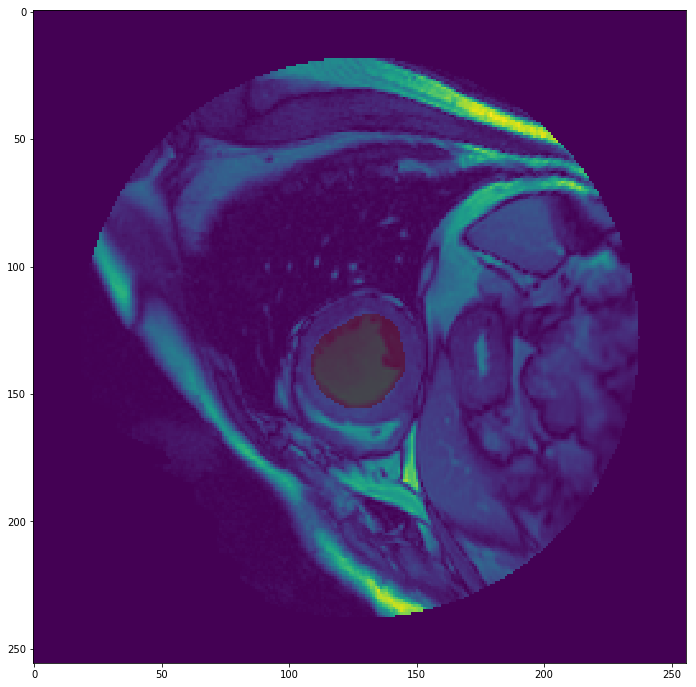

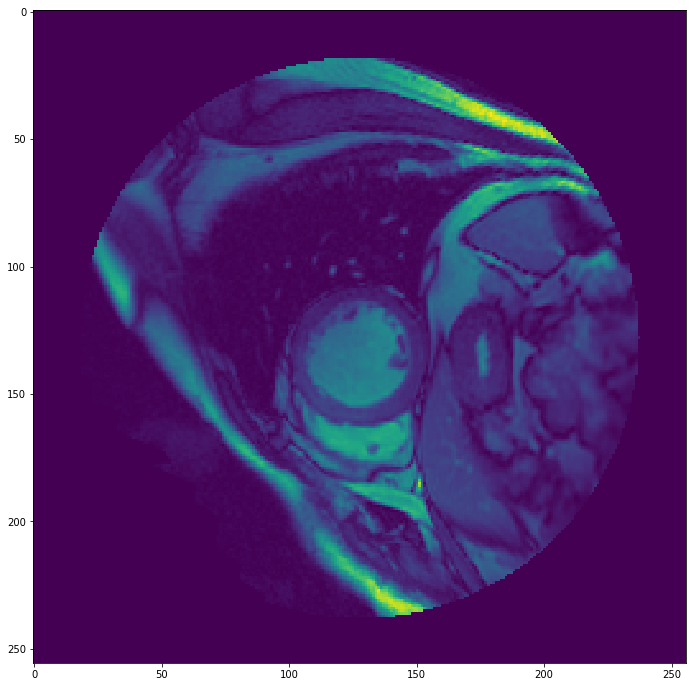

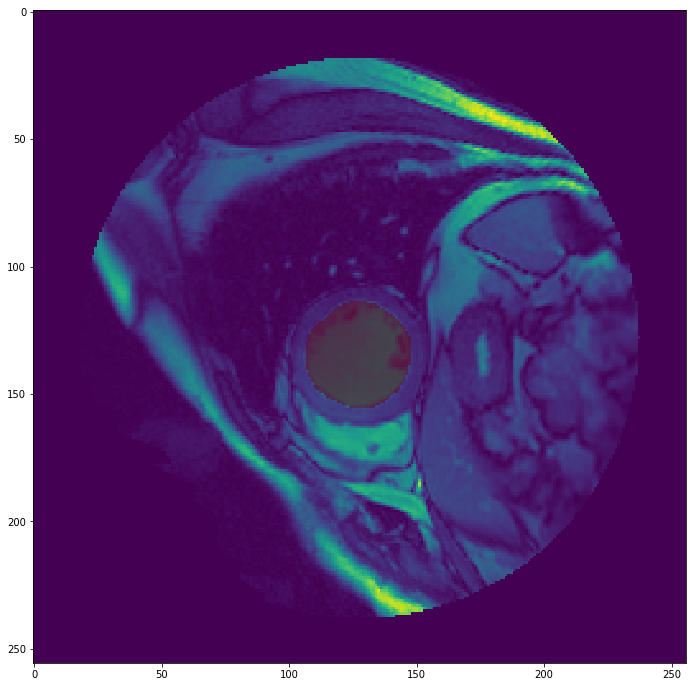

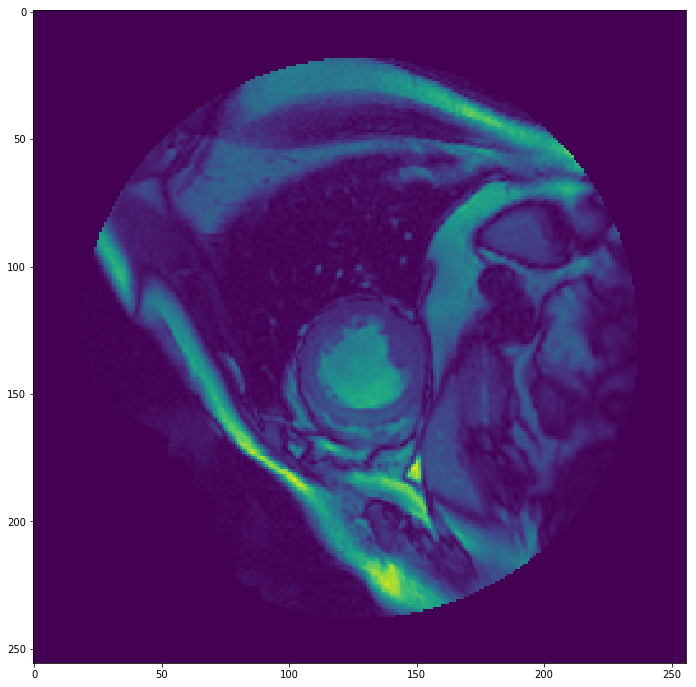

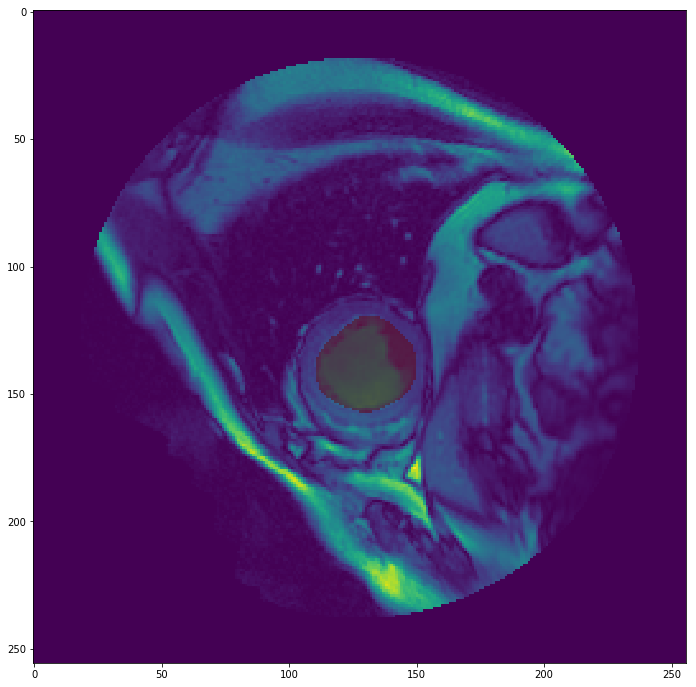

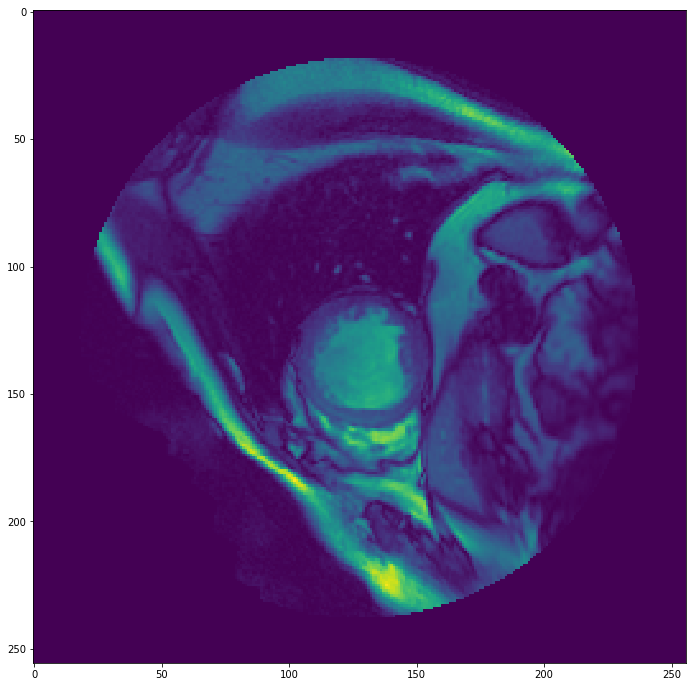

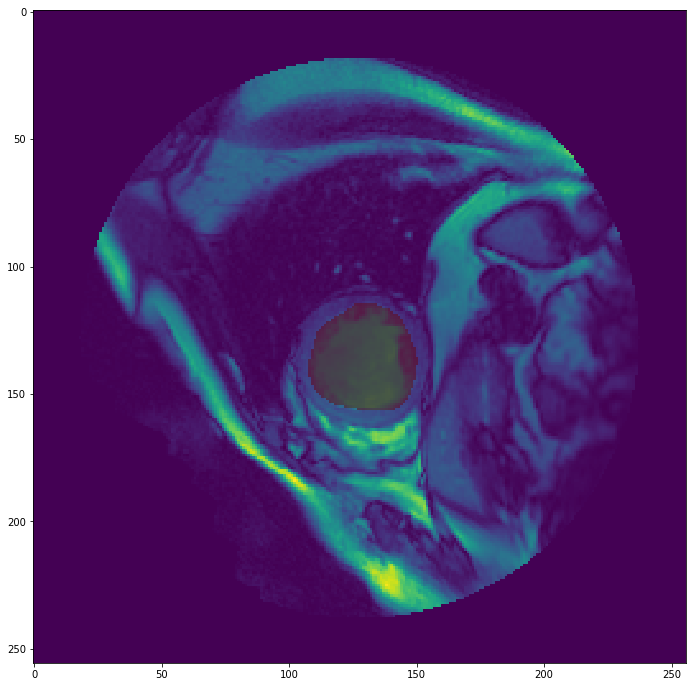

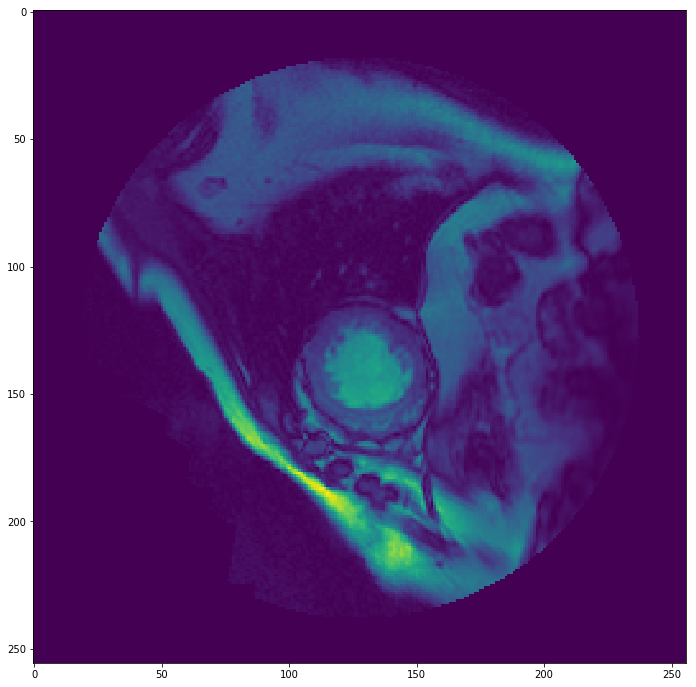

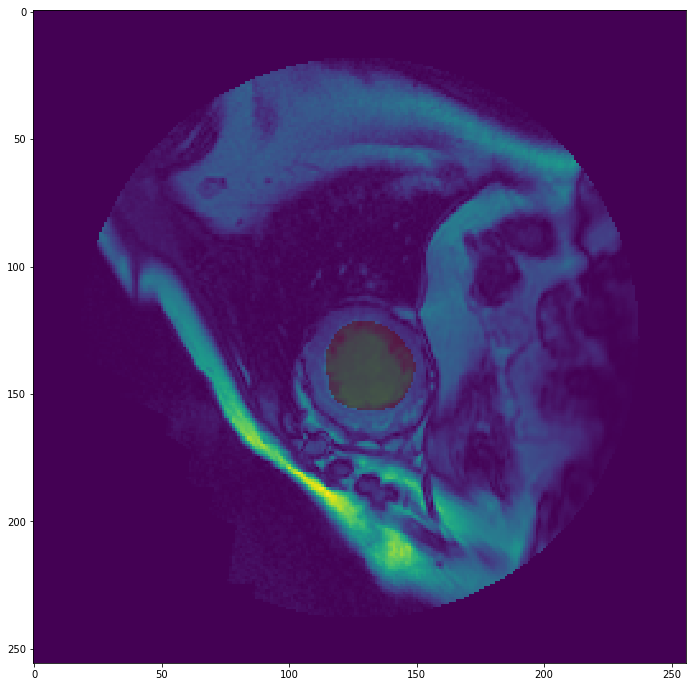

In [74]:
for i, annotated_scan in enumerate(load_annotated_scans(cfg.LINKS_FILE, cfg.DICOMS_DIR, cfg.CONTOURS_DIR)):
    plot_annotated_scan(annotated_scan, plot_mask=True)
    if i >= 10:
        break

In [3]:
annotatated_scans_all = list(load_annotated_scans(cfg.LINKS_FILE, cfg.DICOMS_DIR, cfg.CONTOURS_DIR))

# Create test_mask examples

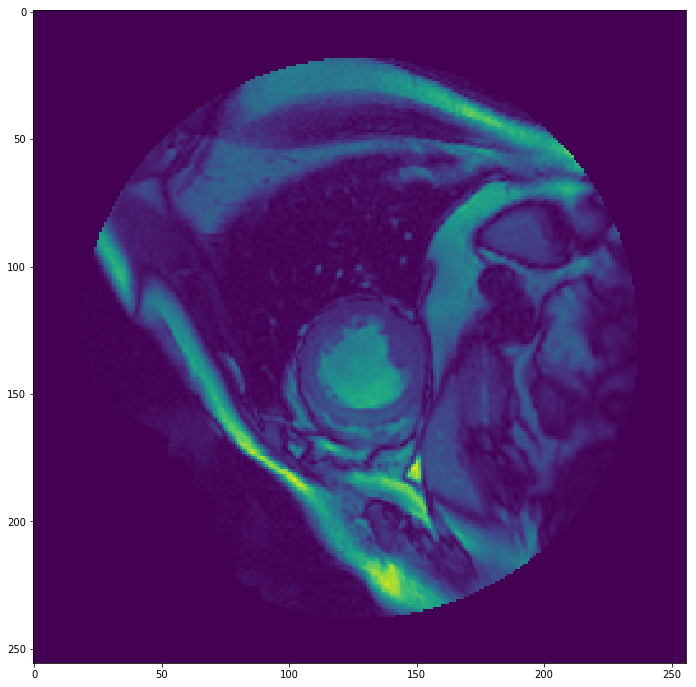

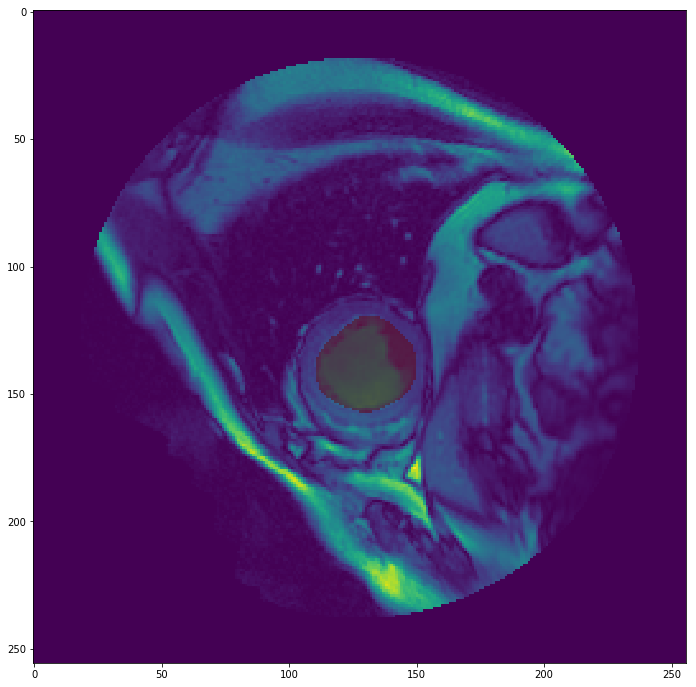

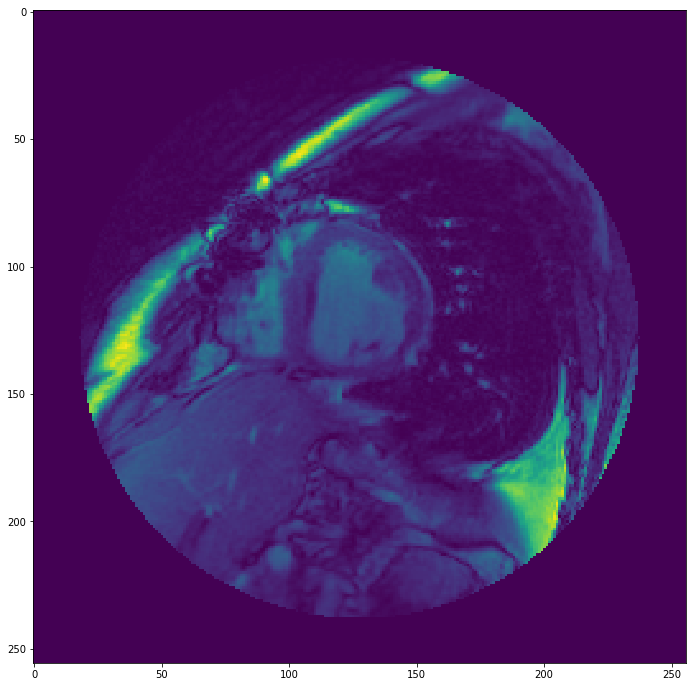

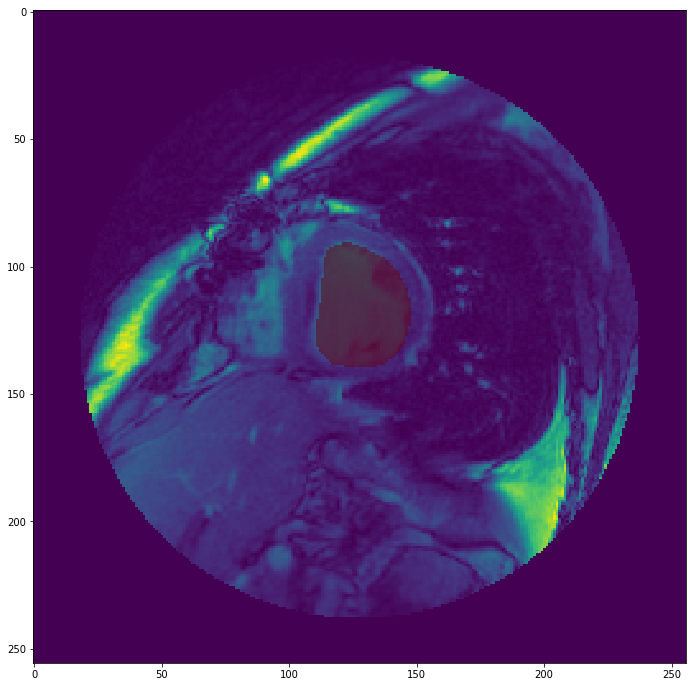

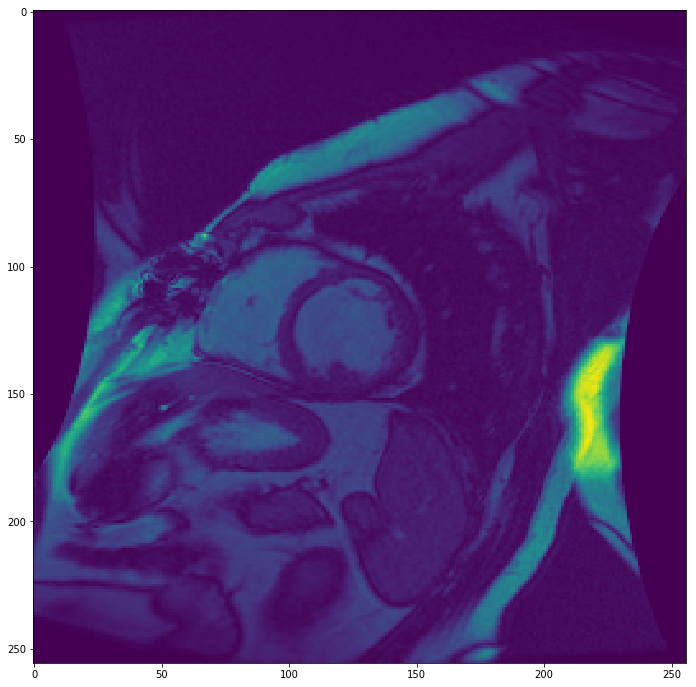

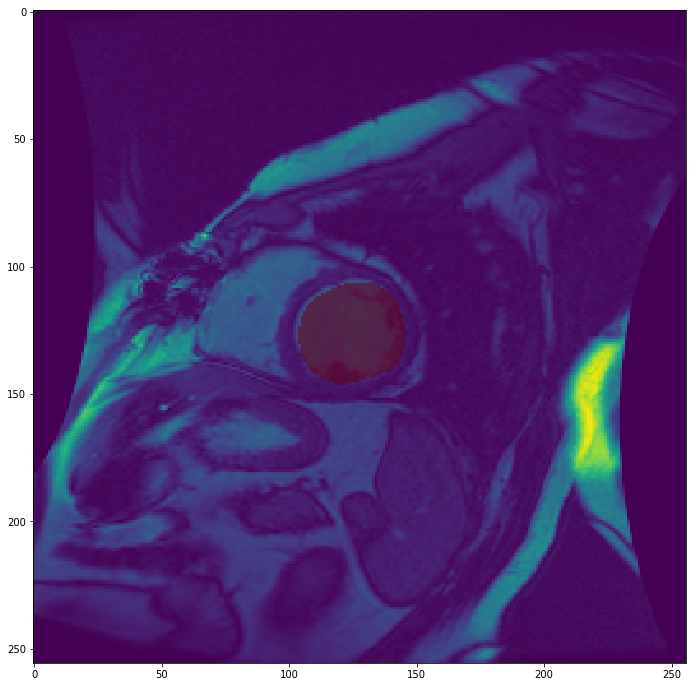

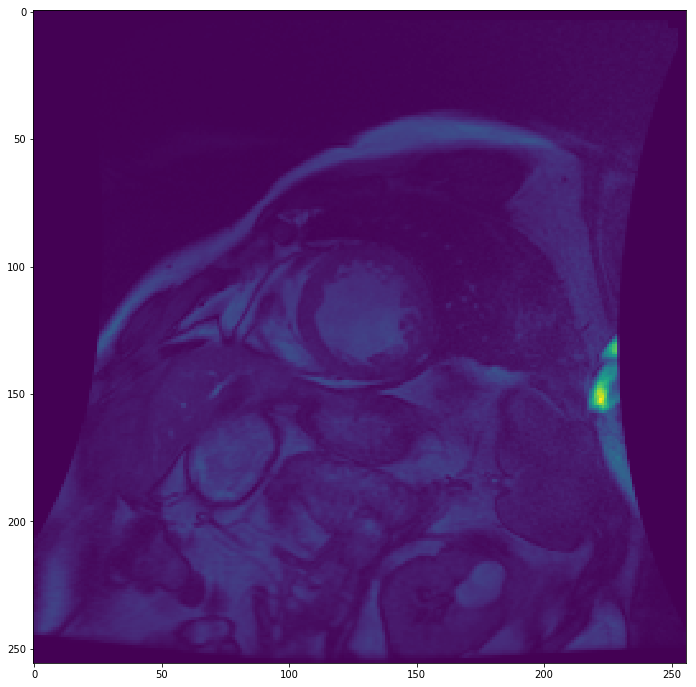

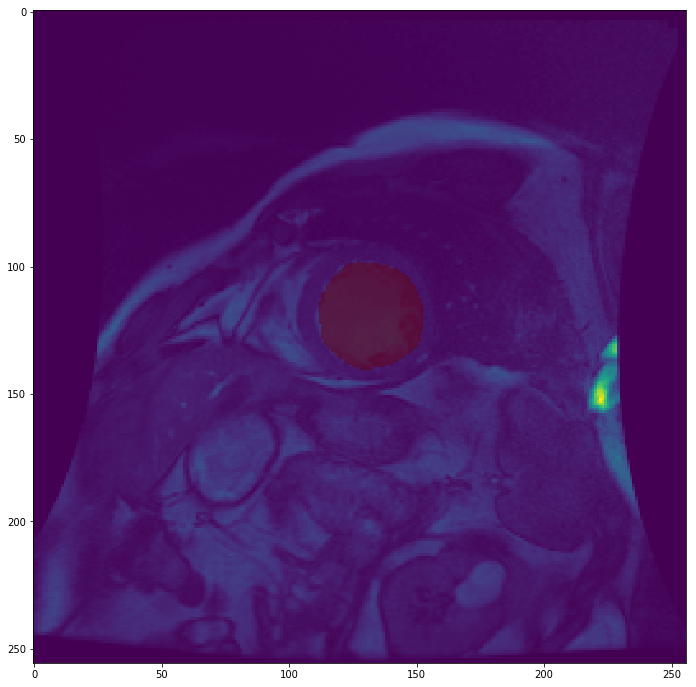

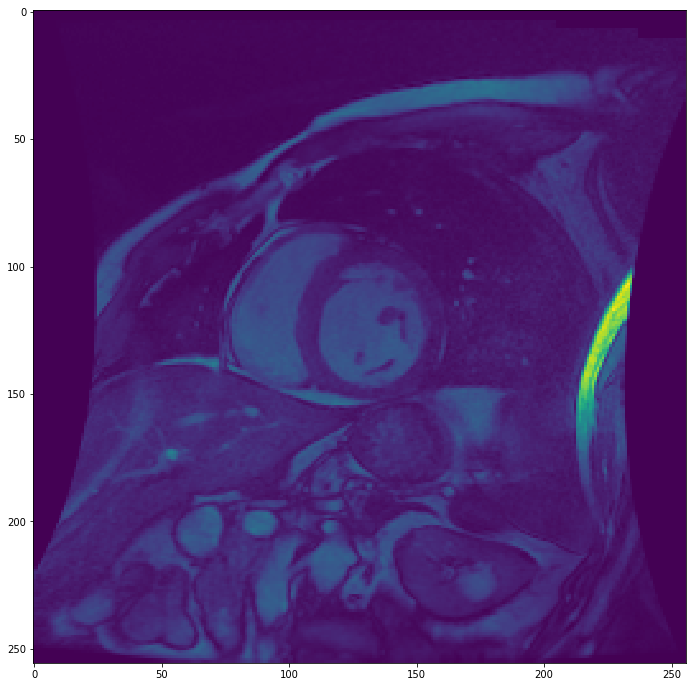

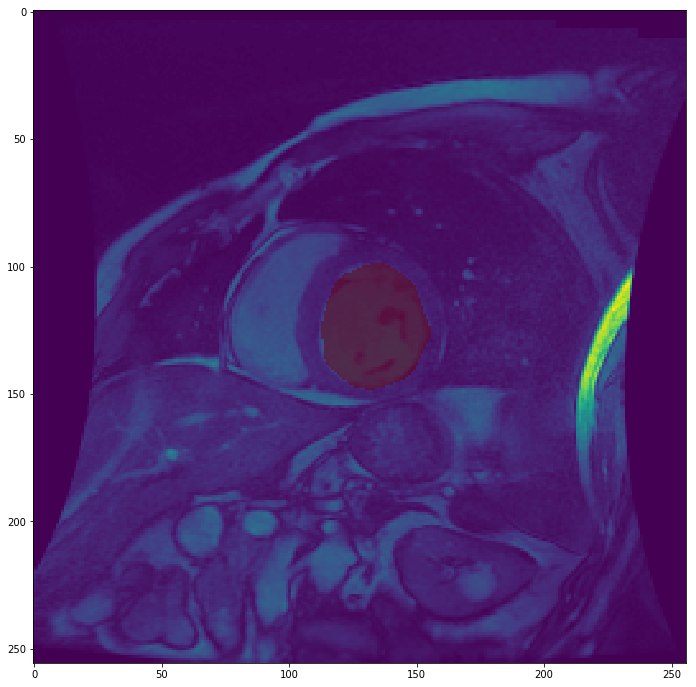

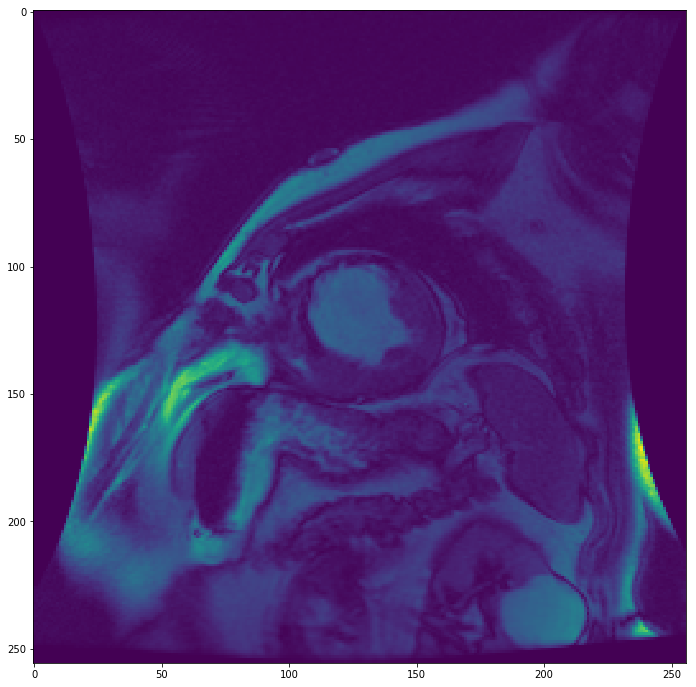

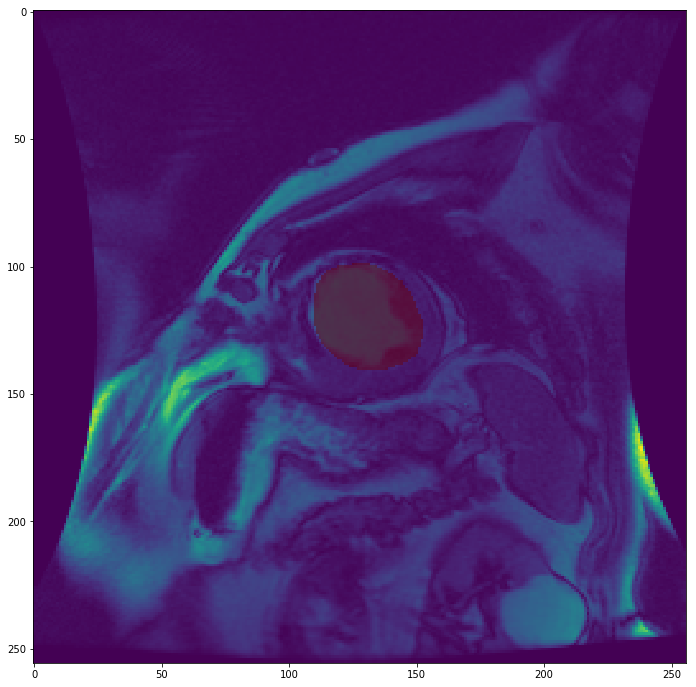

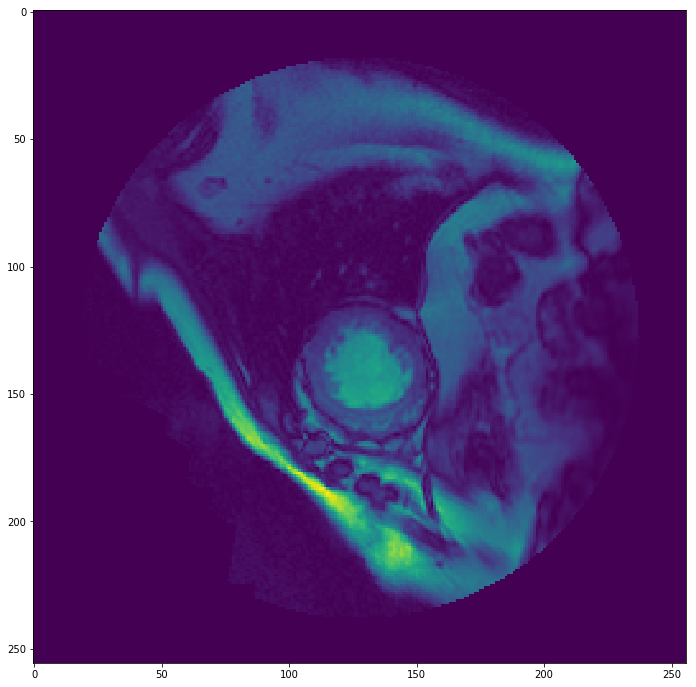

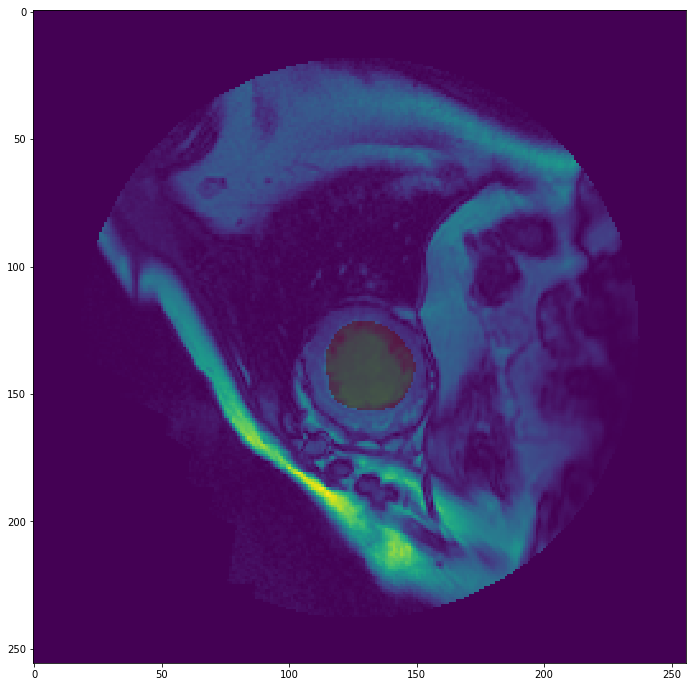

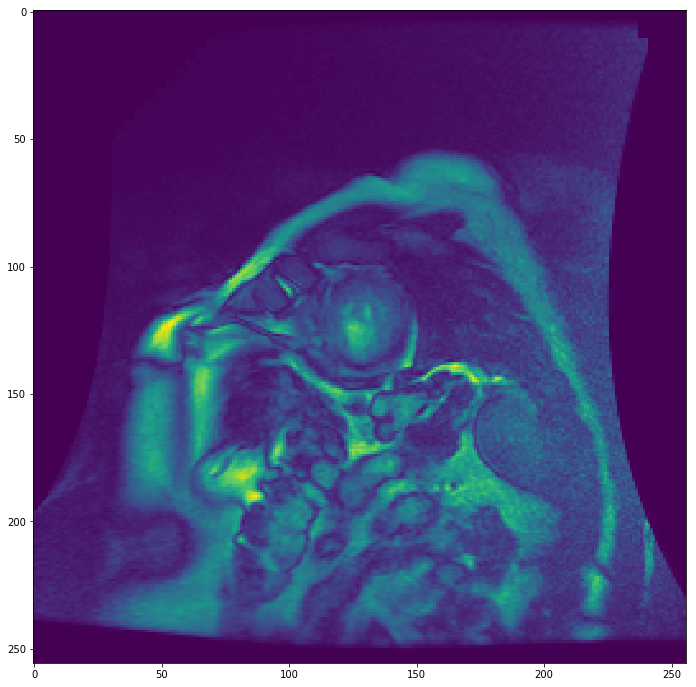

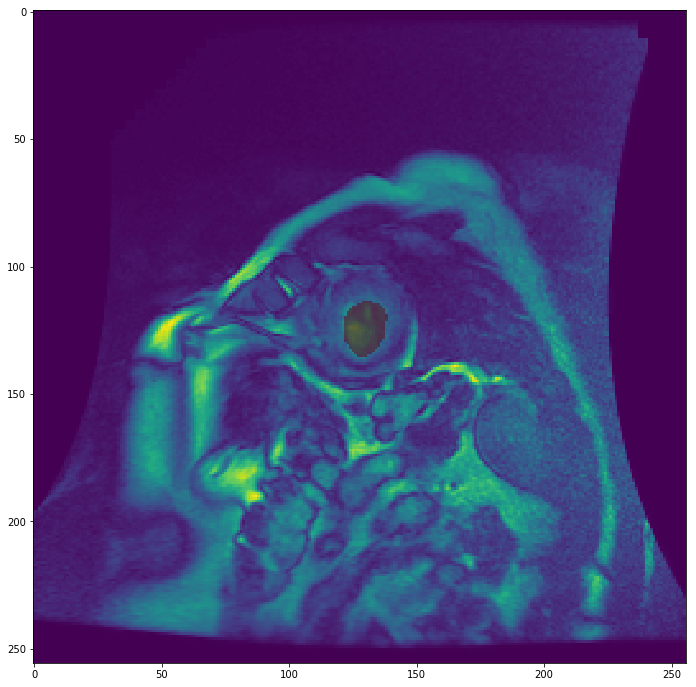

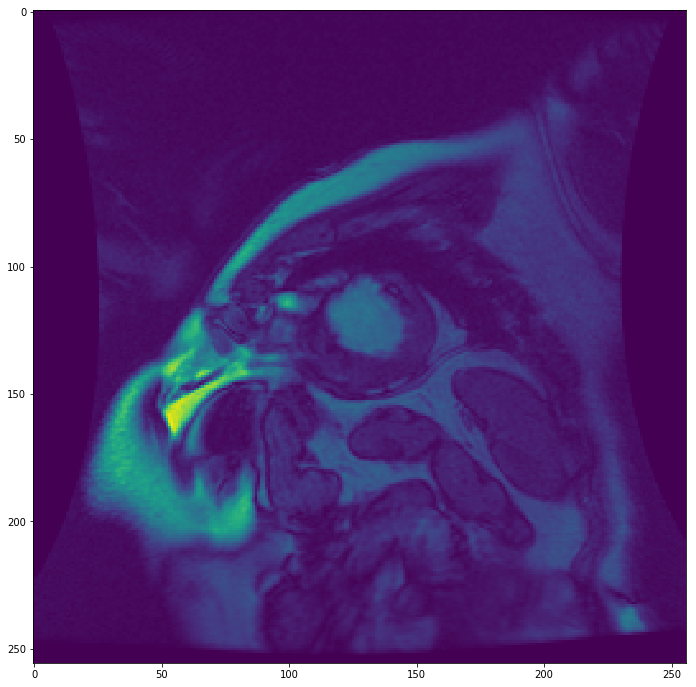

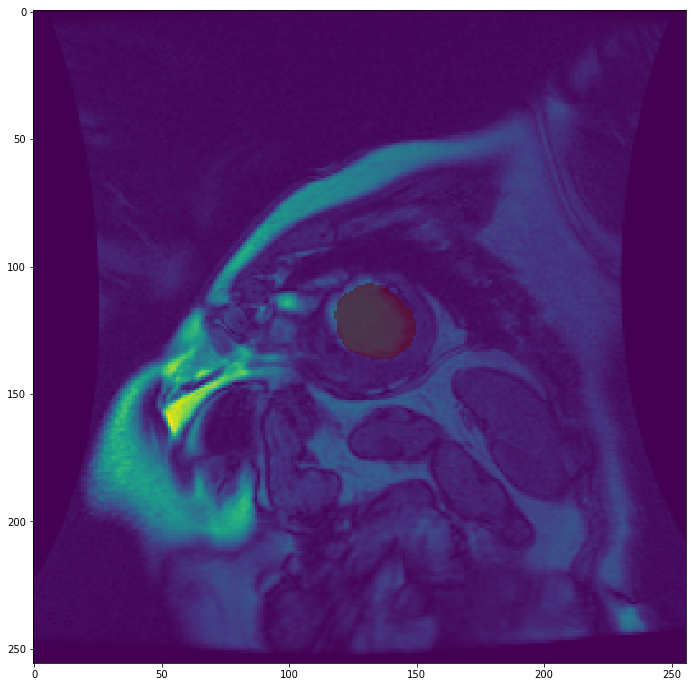

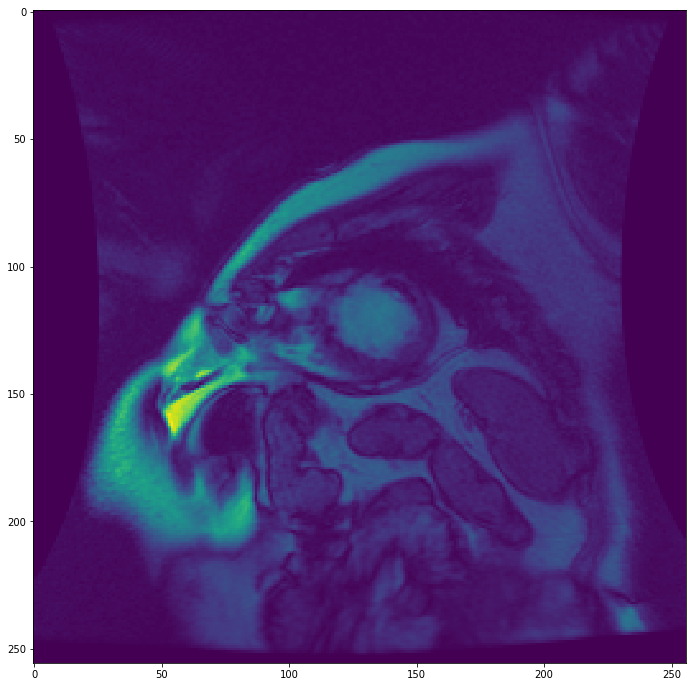

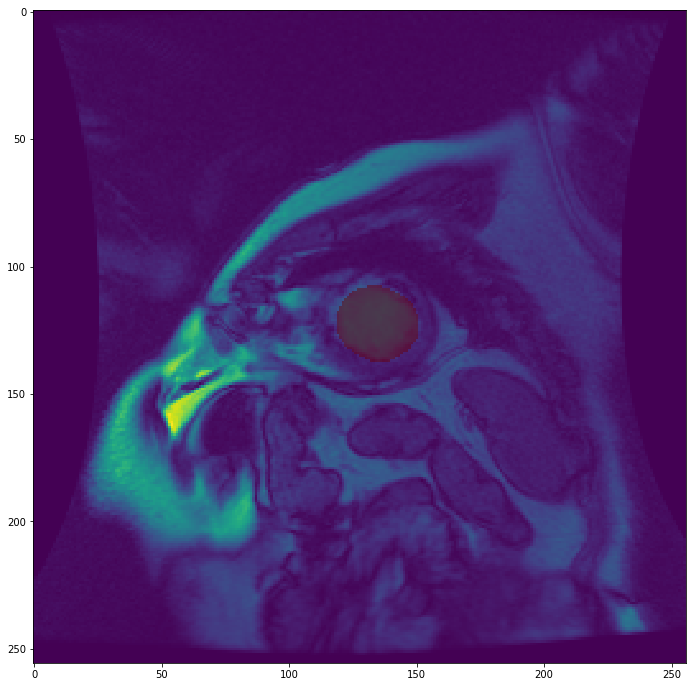

In [4]:
np.random.seed(100)
annotated_scans = np.random.choice(annotatated_scans_all, 10)

for i, annotated_scan in enumerate(annotated_scans):
    plot_annotated_scan(annotated_scan, plot_mask=True)
    
    test_mask_file = os.path.join(cfg.TEST_MASKS_DIR, "{}.pkl".format(i))
    make_sure_path_exists(test_mask_file)
    
    pickle_dump(annotated_scan, test_mask_file)